In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Mumbai Indians') & (df2['team2'] == 'Royal Challengers Bangalore')]
match2 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & (df2['team2'] == 'Mumbai Indians')]

Match1 = Mumbai Home Ground

Match2 = Bangalore Home Ground

# Overall Mumbai vs Bangalore:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season            city        date           team1  \
62    63    2008          Mumbai  2008-04-20  Mumbai Indians   
142  143    2009    Johannesburg  2009-05-03  Mumbai Indians   
152  153    2009  Port Elizabeth  2009-05-10  Mumbai Indians   
187  188    2010          Mumbai  2010-03-20  Mumbai Indians   
225  226    2010       Bangalore  2010-04-17  Mumbai Indians   

                           team2                  toss_winner toss_decision  \
62   Royal Challengers Bangalore               Mumbai Indians           bat   
142  Royal Challengers Bangalore               Mumbai Indians           bat   
152  Royal Challengers Bangalore               Mumbai Indians           bat   
187  Royal Challengers Bangalore               Mumbai Indians           bat   
225  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

     result  dl_applied                       winner  win_by_runs  \
62   normal           0  Royal Challengers Bangalore            0   
142  normal           0  Royal Challengers Bangalore            0   
152  normal           0               Mumbai Indians           16   
187  normal           0  Royal Challengers Bangalore            0   
225  normal           0               Mumbai Indians           57   

     win_by_wickets player_of_match                  venue          umpire1  \
62                5      MV Boucher       Wankhede Stadium         SJ Davis   
142               9       JH Kallis  New Wanderers Stadium      RE Koertzen   
152               0       JP Duminy       St George's Park      BR Doctrove   
187               7       JH Kallis      Brabourne Stadium  HDPK Dharmasena   
225               0       R McLaren  M Chinnaswamy Stadium  HDPK Dharmasena   

            umpire2 umpire3  
62        DJ Harper     NaN  
142  TH Wijewardene     NaN  
152      BG Jerling     NaN  
187       SS Hazare     NaN  
225      SJA Taufel     NaN

Matches played between Mumbai and Bangalore.

In [6]:
match.shape

(25, 18)

In [7]:
match['winner'].value_counts()

Mumbai Indians                 16
Royal Challengers Bangalore     9
Name: winner, dtype: int64

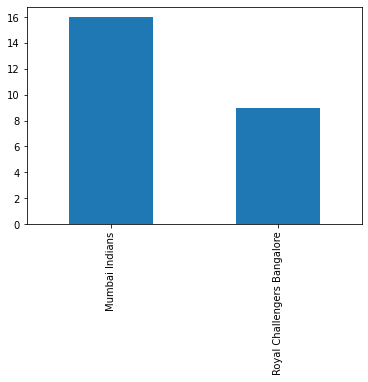

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 16 times and Bangalore won 9 times against each other.

In [9]:
match['toss_winner'].value_counts()

Mumbai Indians                 16
Royal Challengers Bangalore     9
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    17
bat       8
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Mumbai Indians                 10
Royal Challengers Bangalore     3
Name: winner, dtype: int64

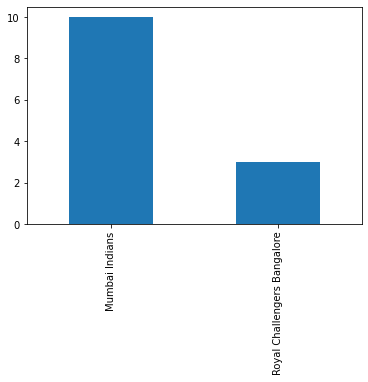

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Mumbai won the toss and won the match 10 times whereas Bangalore 3 times. So winning toss does have affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning                 batting_team    bowling_team  over  \
2589        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2590        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2591        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2592        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2593        12       1  Royal Challengers Bangalore  Mumbai Indians     1   

      ball   batsman non_striker      bowler  is_super_over  ...  bye_runs  \
2589     1  CH Gayle     V Kohli  TG Southee              0  ...         0   
2590     2   V Kohli    CH Gayle  TG Southee              0  ...         0   
2591     3   V Kohli    CH Gayle  TG Southee              0  ...         0   
2592     4  CH Gayle     V Kohli  TG Southee              0  ...         0   
2593     5   V Kohli    CH Gayle  TG Southee              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
2589            0            0             0             1           0   
2590            0            0             0             0           1   
2591            0            0             0             1           0   
2592            0            0             0             1           0   
2593            0            0             0             0           0   

      total_runs  player_dismissed dismissal_kind fielder  
2589           1               NaN            NaN     NaN  
2590           1               NaN            NaN     NaN  
2591           1               NaN            NaN     NaN  
2592           1               NaN            NaN     NaN  
2593           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played Mumbai and Bangalore.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many bowlers from both teams, will get 2 or more wickets:

In [15]:
delivery[delivery['bowling_team'] != 'Mumbai Indians']['bowler'].unique()

array(['S Badree', 'STR Binny', 'S Aravind', 'TS Mills', 'YS Chahal',
       'P Negi', 'A Choudhary', 'AF Milne', 'SR Watson', 'P Kumar',
       'Z Khan', 'JH Kallis', 'R Vinay Kumar', 'B Akhil', 'SB Joshi',
       'A Kumble', 'DW Steyn', 'D du Preez', 'RE van der Merwe',
       'A Mithun', 'KP Appanna', 'Pankaj Singh', 'KP Pietersen',
       'V Kohli', 'DL Vettori', 'DP Nannes', 'TM Dilshan', 'AUK Pathan',
       'CH Gayle', 'J Syed Mohammad', 'HV Patel', 'M Muralitharan',
       'JD Unadkat', 'DT Christian', 'M Kartik', 'R Rampaul', 'RP Singh',
       'MA Starc', 'JA Morkel', 'VR Aaron', 'AB Dinda', 'Yuvraj Singh',
       'Iqbal Abdulla', 'AN Ahmed', 'D Wiese', 'KW Richardson',
       'CJ Jordan', 'UT Yadav', 'CR Woakes', 'Washington Sundar',
       'Mohammed Siraj', 'CJ Anderson', 'TG Southee', 'C de Grandhomme',
       'N Saini', 'M Ali'], dtype=object)

In [38]:
bls_dict = {}
bowlers = ['RD Chahar', 'KA Pollard', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'N Saini', 'M Ali', 'Mohammed Siraj', 'YS Chahal', 'UT Yadav', 'P Negi']
for j in bowlers:
    bls_list = []
    for k in ids:
        wickets = delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j) & (delivery['dismissal_kind'] != 'run out')]['player_dismissed'].count()
        balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['ball'])
        if wickets > 0 and len(balls)>6:
            bls_list.append(wickets)
    if len(bls_list) != 0:
        bls_dict[j] = bls_list
for k,v in bls_dict.items():
    bls_dict[k] = np.mean(v)
bls_dict

{'KA Pollard': 2.0,
 'JJ Bumrah': 2.0,
 'MJ McClenaghan': 1.5714285714285714,
 'HH Pandya': 1.6666666666666667,
 'KH Pandya': 1.6,
 'M Ali': 2.0,
 'Mohammed Siraj': 1.6666666666666667,
 'YS Chahal': 1.7777777777777777,
 'UT Yadav': 2.0,
 'P Negi': 3.0}

So these are the bowlers who got these number of wickets in an average in a match between Mumbai and Bangalore. But we cannot take 'M Ali' and 'P Negi' into consideration as they took wickets only in 1 match.

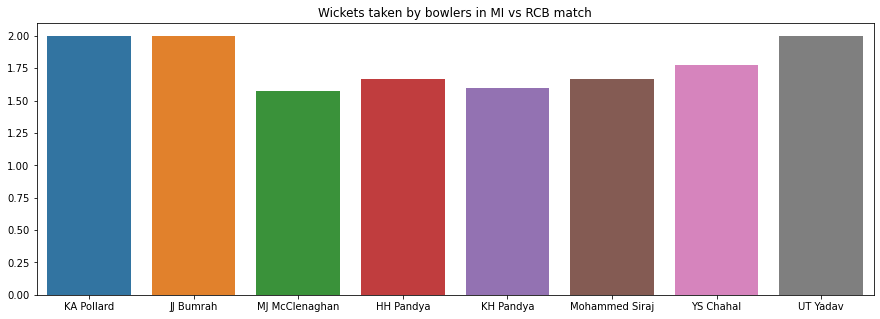

In [39]:
del bls_dict['M Ali']
del bls_dict['P Negi']
wickets = pd.Series(list(bls_dict.values()),index = list(bls_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = wickets.index, y = wickets,ax=ax)
plt.title('Wickets taken by bowlers in MI vs RCB match')
plt.show()

**So Bumrah, Pollard and Umesh Yadav are two bowlers who took 2 or more wickets in a match between Mumbai and Bangalore.**

In [41]:
bls_dict_overall = {}
bowlers_overall = ['RD Chahar', 'KA Pollard', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'DS Kulkarni', 'NM Coulter-Nile', 'TA Boult','N Saini', 'M Ali', 'Mohammed Siraj', 'YS Chahal', 'UT Yadav', 'P Negi', 'CH Morris', 'Washington Sundar', 'DW Steyn', 'A Zampa', 'S Dube']
for j in bowlers_overall:
    bls_list = []
    for k in ids:
        wickets = df1[(df1['match_id'] == k) & (df1['bowler'] == j) & (df1['dismissal_kind'] != 'run out')]['player_dismissed'].count()
        balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['ball'])
        if wickets > 0 and len(balls)>6:
            bls_list.append(wickets)
    if len(bls_list) != 0:
        bls_dict_overall[j] = bls_list
for k,v in bls_dict_overall.items():
    bls_dict_overall[k] = np.mean(v)
bls_dict_overall

{'KA Pollard': 2.0,
 'JJ Bumrah': 2.0,
 'MJ McClenaghan': 1.5714285714285714,
 'HH Pandya': 1.6666666666666667,
 'KH Pandya': 1.6,
 'DS Kulkarni': 1.6666666666666667,
 'M Ali': 2.0,
 'Mohammed Siraj': 1.6666666666666667,
 'YS Chahal': 1.7777777777777777,
 'UT Yadav': 2.0,
 'P Negi': 3.0,
 'DW Steyn': 2.0}

So these are the bowlers who got these number of wickets in overall IPL. But we cannot take 'M Ali' and 'P Negi' into consideration as they took wickets only in 1 match.

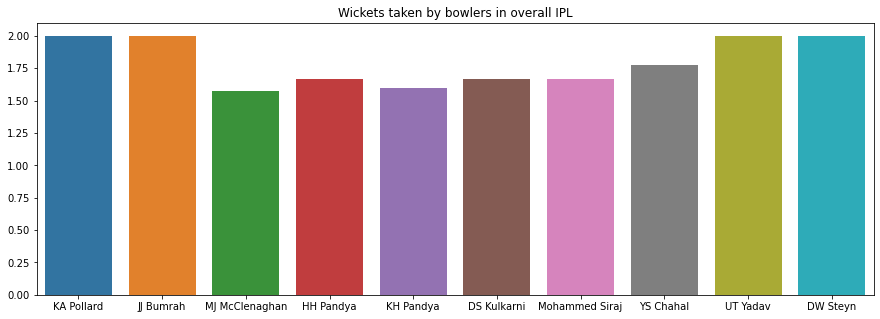

In [42]:
del bls_dict_overall['M Ali']
del bls_dict_overall['P Negi']
wickets_overall = pd.Series(list(bls_dict_overall.values()),index = list(bls_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = wickets_overall.index, y = wickets_overall,ax=ax)
plt.title('Wickets taken by bowlers in overall IPL')
plt.show()

**So only four bowlers of both teams took 2 or more wickets in an average per match in overall IPL.**

## How many bowlers from both teams, will have economy rate less than 8:

In [20]:
economy_dict = {}
bowlers = ['RD Chahar', 'KA Pollard', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'N Saini', 'M Ali', 'Mohammed Siraj', 'YS Chahal', 'UT Yadav', 'P Negi']
for j in bowlers:
    economy_rate_list = []
    for k in ids:
        runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['total_runs'])
        bye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['bye_runs'])
        legbye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['legbye_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        noball_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        for i in range(0,len(runs)):
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate > 0:
            economy_rate_list.append(economy_rate)
    if len(economy_rate_list) != 0:
        economy_dict[j] = economy_rate_list
for k,v in economy_dict.items():
    economy_dict[k] = np.mean(v)
economy_dict

{'RD Chahar': 7.75,
 'KA Pollard': 8.212962962962964,
 'JJ Bumrah': 7.730769230769231,
 'MJ McClenaghan': 9.305555555555555,
 'HH Pandya': 10.357142857142858,
 'KH Pandya': 6.317142857142857,
 'N Saini': 10.958333333333332,
 'M Ali': 4.5,
 'Mohammed Siraj': 9.8125,
 'YS Chahal': 8.272727272727273,
 'UT Yadav': 9.375,
 'P Negi': 10.083333333333334}

These are the bowlers with their economy rates in Mumbai vs Bangalore match.

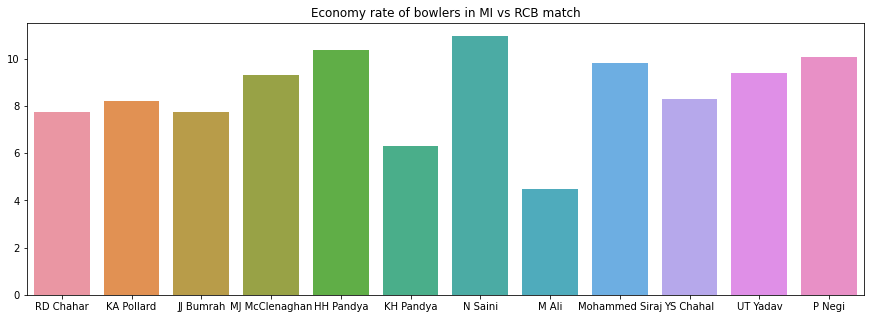

In [21]:
economy = pd.Series(list(economy_dict.values()),index = list(economy_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = economy.index, y = economy,ax=ax)
plt.title('Economy rate of bowlers in MI vs RCB match')
plt.show()

**So we can see four bowlers bowled with economy rate less than 8 till now in Mumbai vs Bangalore match. These bowlers are RD Chahar, JJ Bumrah, KA Pollard and M Ali.**

In [22]:
economy_dict_overall = {}
bowlers_overall = ['RD Chahar', 'KA Pollard', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'DS Kulkarni', 'NM Coulter-Nile', 'TA Boult','N Saini', 'M Ali', 'Mohammed Siraj', 'YS Chahal', 'UT Yadav', 'P Negi', 'CH Morris', 'Washington Sundar', 'DW Steyn', 'A Zampa', 'S Dube']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
for j in bowlers_overall:
    economy_rate_list = []
    for k in total_ids:
        runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['total_runs'])
        bye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['bye_runs'])
        legbye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['legbye_runs'])
        wide_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        noball_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        for i in range(0,len(runs)):
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate > 0:
            economy_rate_list.append(economy_rate)
    if len(economy_rate_list) != 0:
        economy_dict_overall[j] = economy_rate_list
for k,v in economy_dict_overall.items():
    economy_dict_overall[k] = np.mean(v)
economy_dict_overall

{'RD Chahar': 6.81547619047619,
 'KA Pollard': 9.028638847491308,
 'JJ Bumrah': 7.732952398478714,
 'MJ McClenaghan': 8.709969313812481,
 'HH Pandya': 9.424242424242424,
 'KH Pandya': 7.4586642487629335,
 'DS Kulkarni': 8.35049019607843,
 'NM Coulter-Nile': 7.688190476190475,
 'TA Boult': 9.04117259552042,
 'N Saini': 8.729722222222222,
 'M Ali': 6.917862838915472,
 'Mohammed Siraj': 9.596819846819848,
 'YS Chahal': 8.151676984484002,
 'UT Yadav': 8.546086045631833,
 'P Negi': 8.042053663570691,
 'CH Morris': 8.192896174863387,
 'Washington Sundar': 7.847222222222222,
 'DW Steyn': 6.814186744932085,
 'A Zampa': 7.51731078904992}

These are the bowlers with their economy rates in overall IPL.

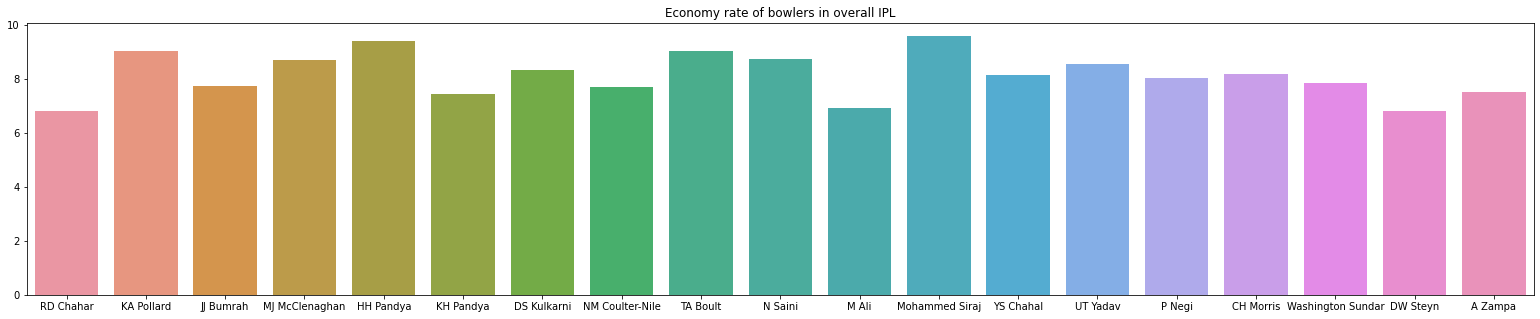

In [23]:
economy_overall = pd.Series(list(economy_dict_overall.values()),index = list(economy_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(27,5))
sns.barplot(x = economy_overall.index, y = economy_overall,ax=ax)
plt.title('Economy rate of bowlers in overall IPL')
plt.show()

**So we can see 8 bowlers bowled with economy rate less than 8 till now in overall IPL. These bowlers are RD Chahar, JJ Bumrah, KH Pandya, NM Coulter-Nile, DW Steyn, Washinton Sundar, A Zampa and M Ali.**

## How many batsmen from both teams, will have strike rate greater than 130 and hit more than 3 boundaries:

In [24]:
strike_rate_dict = {}
batsman = ['Q de Kock', 'Ishan Kishan', 'SS Tiwary', 'HH Pandya', 'KH Pandya', 'KA Pollard', 'RG Sharma', 'V Kohli', 'AB de Villiers', 'PA Patel', 'Washington Sundar', 'M Ali', 'S Dube']
for j in batsman:
    strike_rate_list = []
    for k in ids:
        runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['wide_runs'])
        strike_rate = 0
        s = 0
        wide = 0
        boundary = 0
        for i in range(0,len(runs)):
            s += runs[i]
            if wide_runs[i] > 0:
                wide += 1
            if runs[i] >= 4:
                boundary += 1
        total_balls = len(runs) - wide
        if total_balls >= 10 and boundary >= 3:
            strike_rate = (s/total_balls)*100
        if strike_rate > 0:
            strike_rate_list.append(strike_rate)
    if len(strike_rate_list) != 0:
        strike_rate_dict[j] = strike_rate_list
for k,v in strike_rate_dict.items():
    strike_rate_dict[k] = np.mean(v)
strike_rate_dict

{'Q de Kock': 149.23076923076923,
 'SS Tiwary': 144.5098886328725,
 'HH Pandya': 211.1111111111111,
 'KH Pandya': 123.33333333333334,
 'KA Pollard': 190.0796807167594,
 'RG Sharma': 166.2028904298641,
 'V Kohli': 139.6380716653323,
 'AB de Villiers': 177.7349303477284,
 'PA Patel': 146.42902711323762,
 'M Ali': 159.375}

These are the strike rate of the batsmen in Mumbai vs Bangalore match.

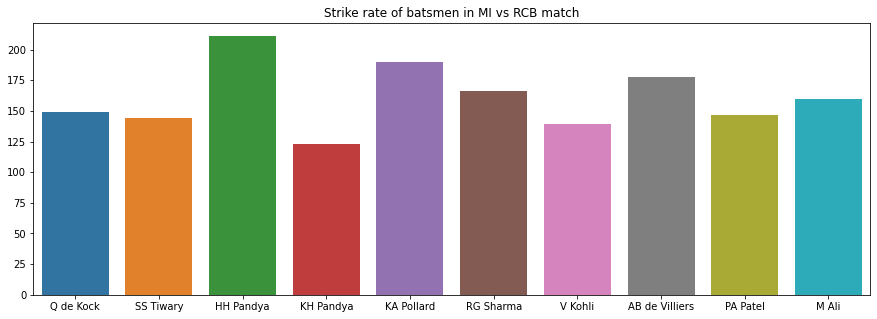

In [25]:
strike_rate = pd.Series(list(strike_rate_dict.values()),index = list(strike_rate_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = strike_rate.index, y = strike_rate,ax=ax)
plt.title('Strike rate of batsmen in MI vs RCB match')
plt.show()

**Almost every batsmen except Krunal Pandya has strike rate greater than 130 and hit 3 or more boundaries in an average per match in Mumbai vs Bangalore match.**

In [26]:
strike_rate_dict_overall = {}
batsman_overall = ['Q de Kock', 'Ishan Kishan', 'SS Tiwary', 'HH Pandya', 'KH Pandya', 'KA Pollard', 'RG Sharma', 'SA Yadav', 'V Kohli', 'AB de Villiers', 'PA Patel', 'Washington Sundar', 'M Ali', 'S Dube', 'AJ Finch', 'Gurkeerat Singh', ]
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    strike_rate_list = []
    for k in total_ids:
        runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        wide_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['wide_runs'])
        strike_rate = 0
        s = 0
        wide = 0
        boundary = 0
        for i in range(0,len(runs)):
            s += runs[i]
            if wide_runs[i] > 0:
                wide += 1
            if runs[i] >= 4:
                boundary += 1
        total_balls = len(runs) - wide
        if total_balls >= 10 and boundary >= 3:
            strike_rate = (s/total_balls)*100
        if strike_rate > 0:
            strike_rate_list.append(strike_rate)
    if len(strike_rate_list) != 0:
        strike_rate_dict_overall[j] = strike_rate_list
for k,v in strike_rate_dict_overall.items():
    strike_rate_dict_overall[k] = np.mean(v)
strike_rate_dict_overall

{'Q de Kock': 148.9354511845022,
 'Ishan Kishan': 153.39003311565324,
 'SS Tiwary': 137.6430356526749,
 'HH Pandya': 209.8872871054824,
 'KH Pandya': 173.54445906447006,
 'KA Pollard': 187.4121204286444,
 'RG Sharma': 148.97232670865304,
 'SA Yadav': 171.31179138321994,
 'V Kohli': 138.99455182532444,
 'AB de Villiers': 172.74081892855028,
 'PA Patel': 133.6392230627647,
 'Washington Sundar': 194.73684210526315,
 'M Ali': 191.5983893557423,
 'AJ Finch': 144.5165271795576,
 'Gurkeerat Singh': 159.24521750179642}

These are the strike rate of the batsmen in overall IPL.

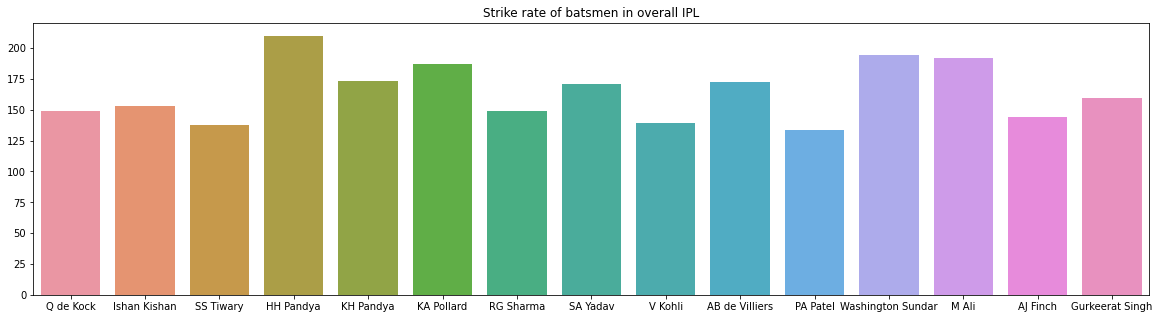

In [37]:
strike_rate_overall = pd.Series(list(strike_rate_dict_overall.values()),index = list(strike_rate_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = strike_rate_overall.index, y = strike_rate_overall,ax=ax)
plt.title('Strike rate of batsmen in overall IPL')
plt.show()

**So we can see batsmen of Mumbai and Bangalore, everyone has strike rate over 130 and hit 3 or more boundaries in overall IPL. But it's a fact that it's not possible for every batsman to keep this strike rate in every match.**

## How many runs more/less will MI score in the first 6 overs as compared to RCB:

In [28]:
runs = []
for j in ids:
    runs_Mumbai = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Mumbai Indians') & (delivery['over'] <= 6)]['total_runs'].sum()
    runs_Bangalore = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Mumbai Indians') & (delivery['over'] <= 6)]['total_runs'].sum()
    runs.append(np.abs(runs_Mumbai - runs_Bangalore))
print(runs)

[7, 26, 7, 10, 0, 10, 10, 17, 19, 14, 15, 14, 8, 20, 3, 3, 16, 16, 8, 7, 6, 2, 14, 2, 19]


These are the difference of the runs scored by Mumbai and Banaglore in their match.

In [29]:
avg_runs = np.mean(runs)
avg_runs

10.92

So ~11 runs more/less scored by Mumbai in the first 6 overs as compared to Bangalore in Mumbai vs Bangalore match.

In [30]:
runs_Mumbai_batting_first_Bangalore_batting_second = []
for j in ids:
    runs_Mumbai = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Mumbai Indians') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['total_runs'].sum()
    runs_Bangalore = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Mumbai Indians') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['total_runs'].sum()
    if (runs_Mumbai - runs_Bangalore) != 0:
        runs_Mumbai_batting_first_Bangalore_batting_second.append(np.abs(runs_Mumbai - runs_Bangalore))
runs_Mumbai_batting_first_Bangalore_batting_second

[7, 26, 7, 10, 10, 10, 17, 19, 14, 15, 14, 8]

These are the difference of the runs scored by Mumbai and Bnaglore in their match when Mumbai batted in first inning and Bangalore batted in second inning.

In [31]:
avg_runs_Mumbai_batting_first_Bangalore_batting_second = np.mean(runs_Mumbai_batting_first_Bangalore_batting_second)
avg_runs_Mumbai_batting_first_Bangalore_batting_second

13.083333333333334

So 13 runs more/less scored by Mumbai in the first 6 overs as compared to Bangalore in Mumbai vs Bangalore match when Mumbai batted in first inning and Bangalore batted in second inning.

In [32]:
runs_Bangalore_batting_first_Mumbai_batting_second = []
for j in ids:
    runs_Mumbai = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Mumbai Indians') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['total_runs'].sum()
    runs_Bangalore = delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Mumbai Indians') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['total_runs'].sum()
    if (runs_Mumbai - runs_Bangalore) != 0:
        runs_Bangalore_batting_first_Mumbai_batting_second.append(np.abs(runs_Mumbai - runs_Bangalore))
runs_Bangalore_batting_first_Mumbai_batting_second

[20, 3, 3, 16, 16, 8, 7, 6, 2, 14, 2, 19]

These are the difference of the runs scored by Mumbai and Bnaglore in their match when Bangalore batted in first inning and Mumbai batted in second inning.

In [33]:
avg_runs_Bangalore_batting_first_Mumbai_batting_second = np.mean(runs_Bangalore_batting_first_Mumbai_batting_second)
avg_runs_Bangalore_batting_first_Mumbai_batting_second

9.666666666666666

So ~10 runs more/less scored by Mumbai in the first 6 overs as compared to Bangalore in Mumbai vs Bangalore match when Bangalore batted in first inning and Mumbai batted in second inning.

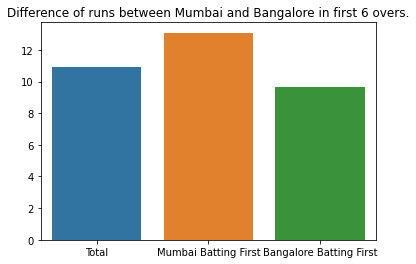

In [34]:
average_runs = pd.Series([avg_runs,avg_runs_Mumbai_batting_first_Bangalore_batting_second,avg_runs_Bangalore_batting_first_Mumbai_batting_second], index = ['Total','Mumbai Batting First','Bangalore Batting First'])
sns.barplot(x = average_runs.index, y = average_runs)
plt.title('Difference of runs between Mumbai and Bangalore in first 6 overs.')
plt.show()

**When Mumbai batted in the first inning, the difference is higher.**

In [35]:
runs_overall_Mumbai = df1[(df1['batting_team'] == 'Mumbai Indians') & (df1['over'] <= 6)]['total_runs'].sum()
total_ids_Mumbai = list(df1[df1['batting_team'] == 'Mumbai Indians']['match_id'].unique())
avg_runs_overall_Mumbai = runs_overall_Mumbai/len(total_ids_Mumbai)
avg_runs_overall_Mumbai

45.44385026737968

Mumbai scored ~45 runs in an average in first 6 overs in overall IPL.

In [36]:
runs_overall_Bangalore = df1[(df1['batting_team'] == 'Royal Challengers Bangalore') & (df1['over'] <= 6)]['total_runs'].sum()
total_ids_Bangalore = list(df1[df1['batting_team'] == 'Royal Challengers Bangalore']['match_id'].unique())
avg_runs_overall_Bangalore = runs_overall_Bangalore/len(total_ids_Bangalore)
avg_runs_overall_Bangalore

45.06111111111111

Bangalore scored ~45 runs in an average in first 6 overs in overall IPL.